In [2]:
import mahotas as mh
raw_dir = 'C:\\Users\\123\\Documents\\Python\\BuildingMachineLearningSystemsWithPython\\ch10\\'
image = mh.imread(raw_dir+'scene00.jpg')

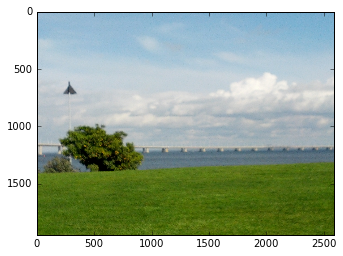

In [3]:
from matplotlib import pyplot as plt
import numpy as np
#plot graf in the same window :
%matplotlib inline 

plt.imshow(image)
plt.show()

In [10]:
har = mh.features.haralick(image)
har_all = np.ravel(har)

In [46]:
columns = ['file']
columns_1 = ['var_'+str(i) for i in range(0,len(har_all))]
columns.extend(columns_1)

df = pd.DataFrame(columns=columns)
df

,file,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168


In [34]:
raw_dir = 'C:\\Users\\123\\Documents\\Python\\BuildingMachineLearningSystemsWithPython\\SimpleImageDataset\\'

In [50]:
import os
lst =os.listdir(raw_dir)
i = 0
for f in lst:
    im = mh.imread(raw_dir+f)
    har = mh.features.haralick(im)
    har_all = np.ravel(har)
    df.loc[i] = 0
    df['file'][i] = f
    df.ix[i,1:] = har_all
    
    i += 1

C:\Users\123\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [91]:
# df.to_csv('image_date.csv',index=False)
df = pd.read_csv('image_date.csv')
df = df.drop(['Unnamed: 0'],axis=1)

In [87]:
df.file[1][:5]

'build'

In [99]:
def hlp(x):
    if x[:4] == 'buil':
        z = 1
    elif x[:4] == 'scen':
        z = 2
    elif x[:4] == 'text':
        z = 3
    return(z)

df['TARGET'] = df.file.apply(hlp)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
x_train = df.drop(['file','TARGET'],axis=1)
y_train = df['TARGET']

clf = RandomForestClassifier(n_estimators=150,max_depth=7,min_samples_split=10)
scores = cross_validation.cross_val_score(clf, x_train, y_train, cv=15)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.28)


In [78]:
def chist(im):
    im = im // 64
    r,g,b = im.transpose((2,0,1))
    pixels = 1*r + 4*b +16*g
    hist = np.bincount(pixels.ravel(), minlength=64)
    hist = hist.astype(float)
    hist = np.log1p(hist)
    return(hist)
len(chist(image))

64

In [82]:
columns = ['file']
columns_1 = ['h_var_'+str(i) for i in range(0,len(chist(image)))]
columns.extend(columns_1)

df_h = pd.DataFrame(columns=columns)
df_h

i = 0
for f in lst:
    im = mh.imread(raw_dir+f)
    har_all = chist(im)
    df_h.loc[i] = 0
    df_h['file'][i] = f
    df_h.ix[i,1:] = har_all
    
    i += 1
df_h[:3]

C:\Users\123\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,file,h_var_0,h_var_1,h_var_2,h_var_3,h_var_4,h_var_5,h_var_6,h_var_7,h_var_8,...,h_var_54,h_var_55,h_var_56,h_var_57,h_var_58,h_var_59,h_var_60,h_var_61,h_var_62,h_var_63
0,building00.jpg,13.080470,10.071161,6.042633,1.386294,11.808576,6.630683,4.077537,2.564949,1.609438,...,1.098612,6.899723,0.0,0.000000,9.333443,10.779852,0.0,0.0,11.673751,13.981903
1,building01.jpg,14.202666,10.532949,5.209486,0.000000,11.143324,5.986452,5.135798,1.609438,0.000000,...,2.079442,0.000000,0.0,0.693147,7.664816,10.302901,0.0,0.0,10.504656,13.757508
2,building02.jpg,13.893112,12.677647,7.031741,0.000000,11.311715,12.106031,7.474772,0.000000,3.806662,...,0.000000,0.000000,0.0,0.000000,0.000000,7.776115,0.0,0.0,8.571681,14.132136


In [100]:
df_n = df.merge(df_h,on='file')
df_n.shape
df_n[:5]

,file,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,h_var_54,h_var_55,h_var_56,h_var_57,h_var_58,h_var_59,h_var_60,h_var_61,h_var_62,h_var_63
0,building00.jpg,0.000473,111.608605,0.986979,4285.587309,0.332337,288.819201,17030.740633,8.849994,12.297980,...,1.098612,6.899723,0.0,0.000000,9.333443,10.779852,0.0,0.0,11.673751,13.981903
1,building01.jpg,0.000513,63.439525,0.993520,4895.168890,0.364806,219.164953,19517.236034,8.754709,11.840872,...,2.079442,0.000000,0.0,0.693147,7.664816,10.302901,0.0,0.0,10.504656,13.757508
2,building02.jpg,0.000732,104.504583,0.990857,5714.720906,0.404035,245.078953,22754.379039,8.688129,11.730626,...,0.000000,0.000000,0.0,0.000000,0.000000,7.776115,0.0,0.0,8.571681,14.132136
3,building03.jpg,0.000886,20.980921,0.998110,5550.180868,0.500126,269.351619,22179.742553,8.859653,11.198031,...,0.000000,0.000000,0.0,0.000000,8.990815,11.044920,0.0,0.0,11.401960,13.958697
4,building04.jpg,0.000702,62.603952,0.993911,5140.554860,0.368480,273.049602,20499.615488,8.578475,11.585565,...,0.000000,0.000000,0.0,0.000000,4.553877,3.688879,0.0,0.0,10.854856,14.359358


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
x_train = df_n.drop(['file','TARGET'],axis=1)
x_train = StandardScaler().fit_transform(x_train)
y_train = df_n['TARGET']

# clf = RandomForestClassifier(n_estimators=450,max_depth=9,min_samples_split=12)
clf = LogisticRegression()
scores = cross_validation.cross_val_score(clf, x_train, y_train, cv=15)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9556 (+/- 0.1912)


In [123]:
from sklearn.grid_search import GridSearchCV
C_range = 10.0 ** np.arange(-4,3)
grid = GridSearchCV(LogisticRegression(),param_grid={'C':C_range})
scores = cross_validation.cross_val_score(grid, x_train, y_train, cv=15)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9556 (+/- 0.1912)
